<a href="https://colab.research.google.com/github/Professor-Shin/CS-Class-Project/blob/main/Image_Processing/ImPro_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 3 - Image Enhancement in Frequency Domain**
6634468023 Siwakorn Saiphaisri

### **Exercise 1**
 Write a program to enhance the “fish.jpg” and “cabin.jpg” images in frequency domain using
the following filters:


#### a. Notch filters<br>
i. Low-pass filter with radius, 𝑟 equals to 10, 50, and 100, respectively.

ii. High-pass filter with radius, 𝑟 equals to 10, 50, and 100, respectively.

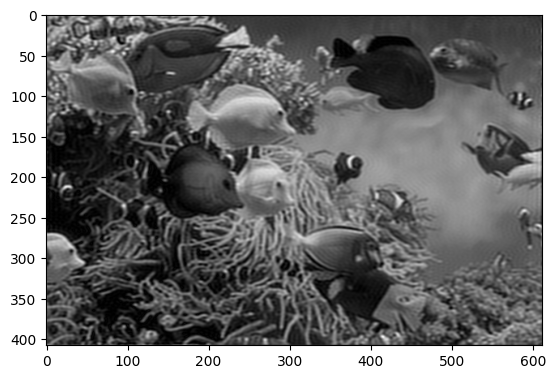

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- Ideal Low-pass Filter ---
def ideal_lowpass_filter(shape, r):
    M, N = shape
    u, v = np.ogrid[:M, :N]
    D = np.sqrt((u - M/2)**2 + (v - N/2)**2)
    H = np.zeros_like(D)
    H[D <= r] = 1
    return H

# --- frequency domain ---
def apply_filter(img, H):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    G = fshift * H
    g = np.abs(np.fft.ifft2(np.fft.ifftshift(G)))
    return g

# --- โหลดภาพและทดสอบกับค่า r ต่าง ๆ ---
img = cv2.imread('fish.jpg', 0)
for r in [10, 50, 100]:
    H = ideal_lowpass_filter(img.shape, r)
    result = apply_filter(img, H)
    cv2.imwrite(f'fish_lowpass_r{r}.jpg', result)
    plt.imshow(result, cmap='gray')


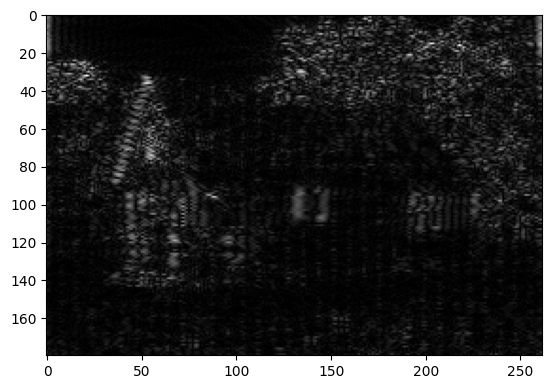

In [ ]:
def ideal_highpass_filter(shape, r):
    return 1 - ideal_lowpass_filter(shape, r)

img = cv2.imread('cabin.jpg', 0)
for r in [10, 50, 100]:
    H = ideal_highpass_filter(img.shape, r)
    result = apply_filter(img, H)
    cv2.imwrite(f'cabin_highpass_r{r}.jpg', result)
    plt.imshow(result, cmap='gray')

#### b. Gaussian filters<br>
i. Low-pass filter with cutoff, 𝐷0 equals to 10, 50, and 100, respectively.


ii. High-pass filter with cutoff, 𝐷0 equals to 10, 50, and 100, respectively.

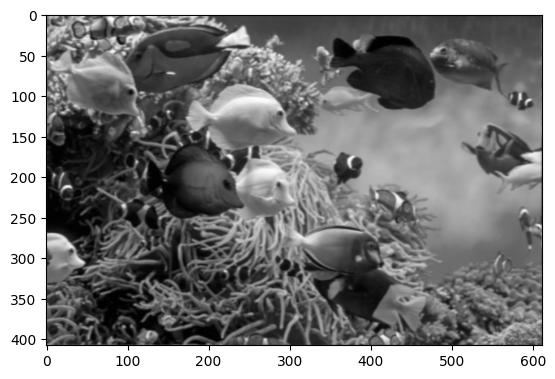

In [ ]:
def gaussian_lowpass_filter(shape, D0):
    M, N = shape
    u, v = np.ogrid[:M, :N]
    D2 = (u - M/2)**2 + (v - N/2)**2
    H = np.exp(-D2 / (2 * (D0**2)))
    return H

img = cv2.imread('fish.jpg', 0)
for D0 in [10, 50, 100]:
    H = gaussian_lowpass_filter(img.shape, D0)
    result = apply_filter(img, H)
    cv2.imwrite(f'fish_gaussian_lowpass_{D0}.jpg', result)
    plt.imshow(result, cmap='gray')

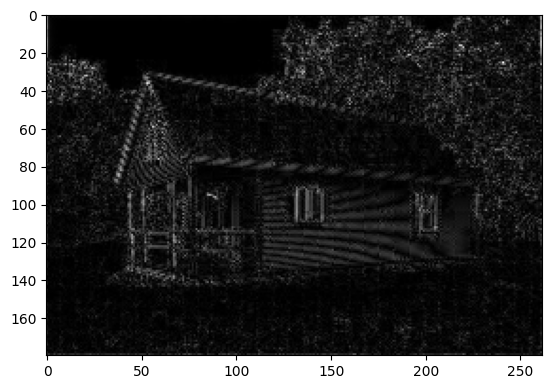

In [ ]:
def gaussian_highpass_filter(shape, D0):
    return 1 - gaussian_lowpass_filter(shape, D0)

img = cv2.imread('cabin.jpg', 0)
for D0 in [10, 50, 100]:
    H = gaussian_highpass_filter(img.shape, D0)
    result = apply_filter(img, H)
    cv2.imwrite(f'cabin_gaussian_highpass_{D0}.jpg', result)
    plt.imshow(result, cmap='gray')

### **Exercise 2**
Remove periodic noise from the given images using any of the filters that you think are the
most suitable ones to be used.

In [ ]:
def notch_filter(shape, points, r=5):
    """สร้าง Notch filter สำหรับลบ periodic noise"""
    M, N = shape
    u, v = np.ogrid[:M, :N]
    H = np.ones((M, N))
    for (u0, v0) in points:
        D1 = np.sqrt((u - u0)**2 + (v - v0)**2)
        D2 = np.sqrt((u - (M - u0))**2 + (v - (N - v0))**2)
        H[D1 <= r] = 0
        H[D2 <= r] = 0
    return H

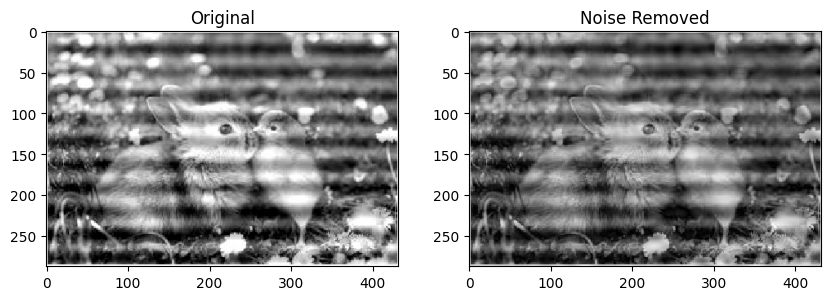

True

In [ ]:
img = cv2.imread('animals_hori_noise.jpg', 0)

f = np.fft.fftshift(np.fft.fft2(img))

points = [(135, 225), (165, 225)]
H = notch_filter(img.shape, points, r=8)

filtered = f * H

result = np.abs(np.fft.ifft2(np.fft.ifftshift(filtered)))

result = cv2.normalize(result, None, 0, 255, cv2.NORM_MINMAX)
result = np.uint8(result)


plt.figure(figsize=(10,5))
plt.subplot(1,2,1); plt.title('Original'); plt.imshow(img, cmap='gray')
plt.subplot(1,2,2); plt.title('Noise Removed'); plt.imshow(result, cmap='gray')
plt.show()

cv2.imwrite('Horizontal_noisy_removed.jpg', result)


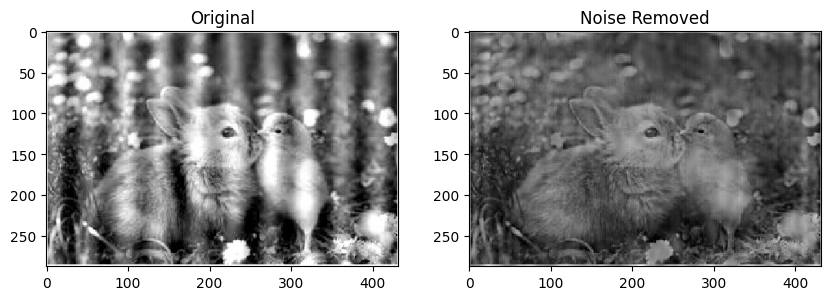

True

In [ ]:
# --- Vertical ---
img = cv2.imread('animals_vert_noise.jpg', 0)
f = np.fft.fftshift(np.fft.fft2(img))

points = [(150, 205), (150, 245)]
H = notch_filter(img.shape, points, r=8)

filtered = f * H

result = np.abs(np.fft.ifft2(np.fft.ifftshift(filtered)))

result = cv2.normalize(result, None, 0, 255, cv2.NORM_MINMAX)
result = np.uint8(result)


plt.figure(figsize=(10,5))
plt.subplot(1,2,1); plt.title('Original'); plt.imshow(img, cmap='gray')
plt.subplot(1,2,2); plt.title('Noise Removed'); plt.imshow(result, cmap='gray')
plt.show()

cv2.imwrite('Horizontal_noisy_removed.jpg', result)

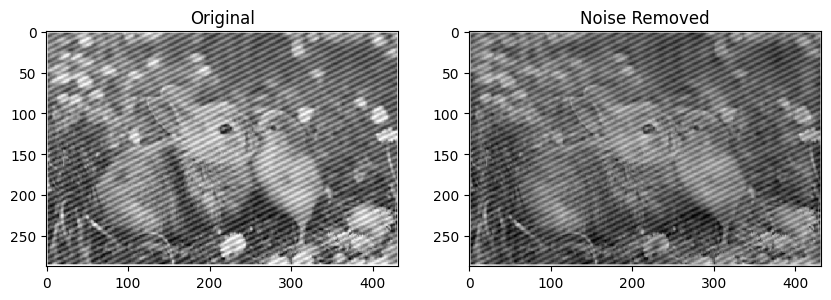

True

In [ ]:
# --- Diagonal ---
img = cv2.imread('animals_diag_noise.jpg', 0)
f = np.fft.fftshift(np.fft.fft2(img))

points = [(140, 205), (160, 245)]
H = notch_filter(img.shape, points, r=8)

filtered = f * H

result = np.abs(np.fft.ifft2(np.fft.ifftshift(filtered)))

result = cv2.normalize(result, None, 0, 255, cv2.NORM_MINMAX)
result = np.uint8(result)


plt.figure(figsize=(10,5))
plt.subplot(1,2,1); plt.title('Original'); plt.imshow(img, cmap='gray')
plt.subplot(1,2,2); plt.title('Noise Removed'); plt.imshow(result, cmap='gray')
plt.show()

cv2.imwrite('Horizontal_noisy_removed.jpg', result)